##***LetsGrowMore***
**Data Science Internship**

**Name: Gauri Dawkhar**

#Iris Flower Classification-TASK 1
The aim is to clasify Iris flowers among three species from measurements of sepals and petal's length and width which are given in cm.

The Iris dataset contains 3 classes of 50 instances each, where each class refers to type of iris plant.

Three classes available are:-

*   Iris Setosa
*   Iris Versicolor

*   Iris Verginica

##Import Modules

In [66]:
import pandas as pd                #To store the data sets
import numpy as np                  #To carry out operations with the arrays.
import os                            # used to handle some files if necessary
import matplotlib.pyplot as plt       # Visualize the data in the form of graphs
import seaborn as sns                  # visualize graphs

##Loading the Dataset

In [67]:
df = pd.read_csv('IRIS.csv')

In [68]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
# for info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
# to display number of samples of each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

##Pre-processing the data

In [71]:
#the null values should be removed or replaced with mean median or mode
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
# No null values for the corresponding database

##Exploratory Data Analysis
To visualize the data in the form of graphs

###Histogram

<Axes: >

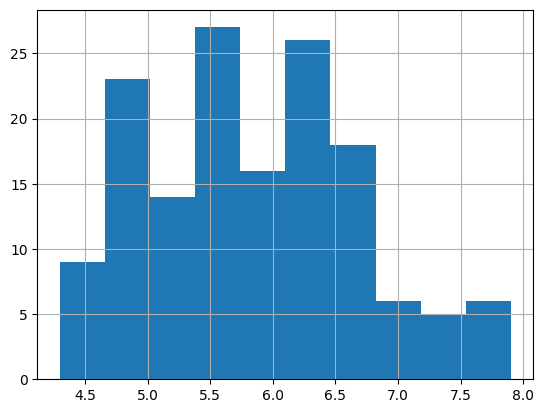

In [73]:
df['sepal_length'].hist()

<Axes: >

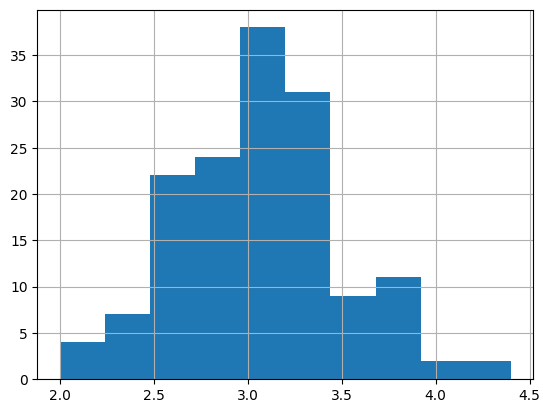

In [74]:
df['sepal_width'].hist()

<Axes: >

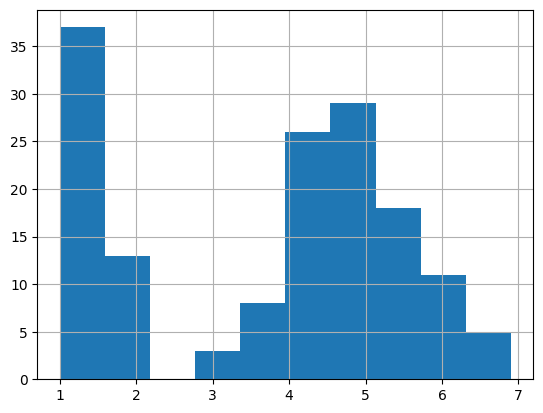

In [75]:
df['petal_length'].hist()

<Axes: >

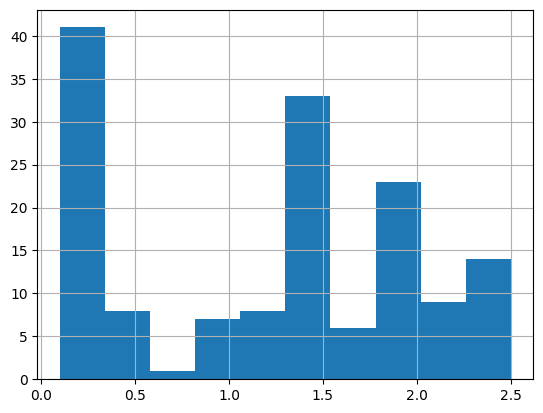

In [76]:
df['petal_width'].hist()

###Scatterplot

In [77]:
colors = ['red', 'blue', 'purple']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

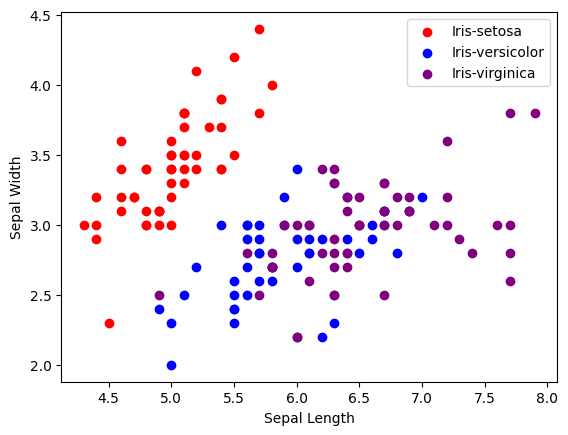

In [78]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

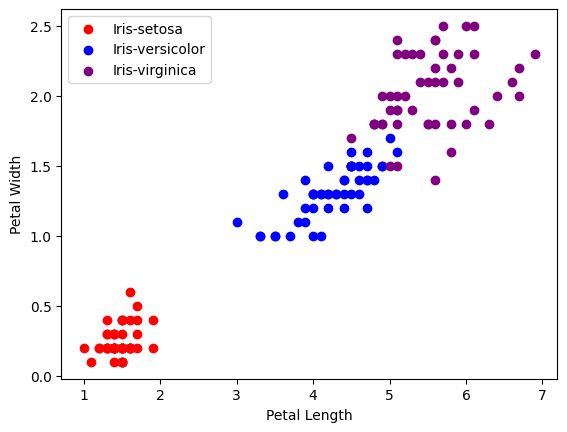

In [79]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

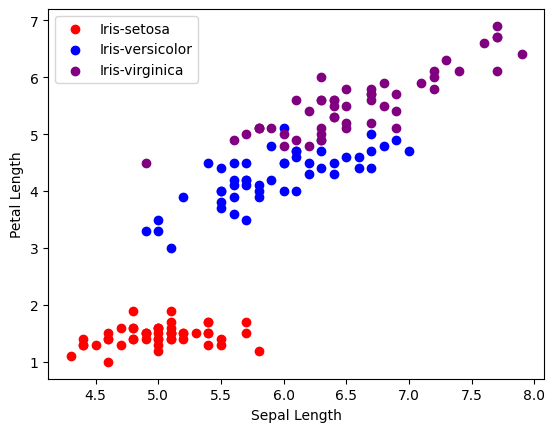

In [80]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

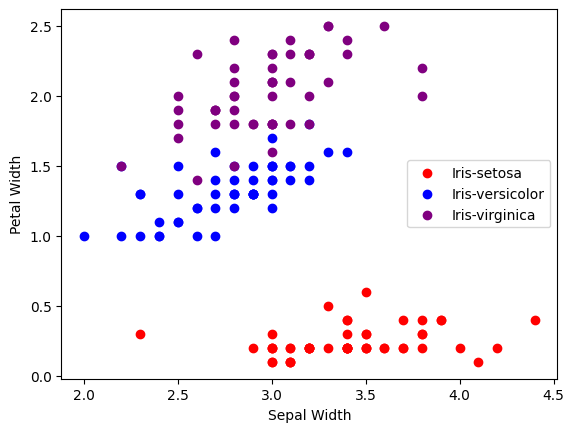

In [81]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

##Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables.

The value is in the range of -1 to 1. If two variable have high correlation, we can neglect one variable from those two.

In [82]:
# creating correlation matrix - correlation matrix is used to understand the importance between two variables
df.corr()

<ipython-input-82-59df2d59c36b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Heatmap

<ipython-input-83-2d8b08752043>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

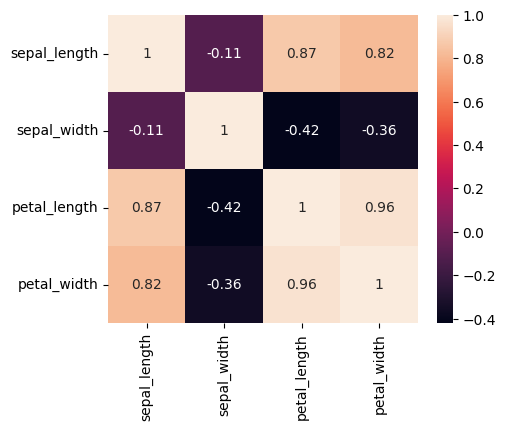

In [83]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4)) # to set the size of the graphs
sns.heatmap(corr, annot=True, ax=ax)

##Label Encoder
Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format

In [38]:
# import label encoder module
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Model Training

In [40]:
from sklearn.model_selection import train_test_split
# train - 70%
# test - 30%
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Logistic Regression


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train) # training the model

LogisticRegression()

In [43]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


knn - k-nearest neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [45]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [48]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333
